## Introduction : IN this section we will read about the outlier detction and the removal technique which is trmiing ,z_score and Capping technique

In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['placement.csv']))

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


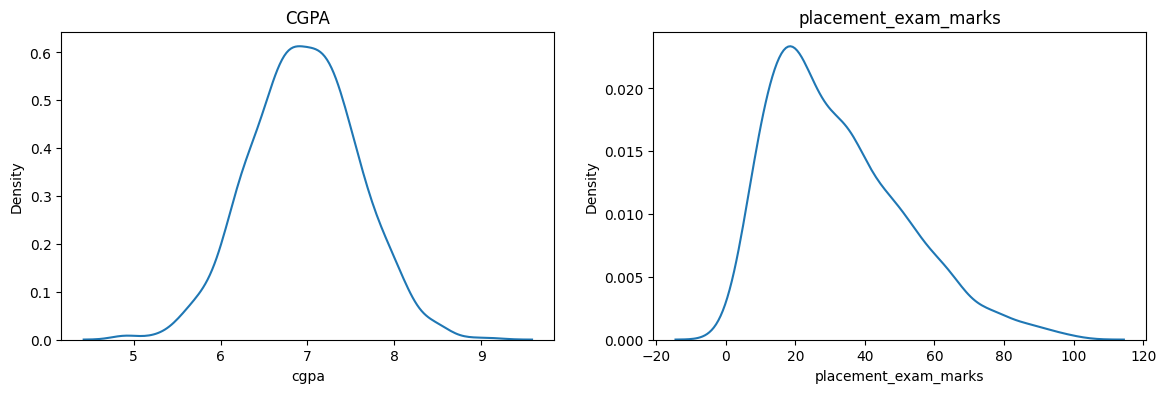

In [ ]:
# outlier detection ans removal technique work better on uniform distibution so first check the distribution of the data
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(df['cgpa'])
plt.title("CGPA")

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.title("placement_exam_marks")

plt.show()

In [ ]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [ ]:
# from above we can ssee than cgpa is ditributed normally so we can effectly perform further otlier detection ans removal process on that column only
# now lets check for the outlier in cgpa
print("mean value (u)",df['cgpa'].mean())
print("S.D :",df['cgpa'].std())
print("Minumum :",df['cgpa'].min())
print("Maximum :",df['cgpa'].max())

mean value (u) 6.96124
S.D : 0.6158978751323896
Minumum : 4.89
Maximum : 9.12


In [ ]:
# now lets calculate the value from above data
high_val = df['cgpa'].mean() + (3*df['cgpa'].std())
low_val = df['cgpa'].mean() - (3*df['cgpa'].std())

In [ ]:
print("higher value =",high_val)
print("Lower value =",low_val)

higher value = 8.808933625397168
Lower value = 5.113546374602832


In [ ]:
df[(df['cgpa']>high_val) | (df['cgpa']<low_val)]  # these given result are the outlies of the data set

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# now lets' pefomr trimming and remove the outlier from data
new_df = df[(df['cgpa']<high_val) & (df['cgpa']>low_val)]

In [ ]:
new_df  # we can clerly see that the outliers are removed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## 2.Now let's find out the outliers by the Z_score calculation

In [ ]:
df['Z_score'] = (df['cgpa'] -df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
# where the z score value exceed 3 and -3 that data is treated as the outlies

df[(df['Z_score']>3) | (df['Z_score']<-3)]

,cgpa,placement_exam_marks,placed,Z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## 3.Capping : replace the outlies with the lower ans the higher limit

In [ ]:
lower_lim = df['cgpa'].mean()-3*df['cgpa'].std()
upper_lim = df['cgpa'].mean()+3*df['cgpa'].std()

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_lim,
    upper_lim,
    np.where(
        df['cgpa']<lower_lim,
        lower_lim,
        df['cgpa']
    )
)

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
df[(df['cgpa']>high_val) | (df['cgpa']<low_val)]

,cgpa,placement_exam_marks,placed,Z_score


## so we have succesfully performed the capping